<a href="https://colab.research.google.com/github/PrateekKumar135/BREAST-CANCER-CLASSIFICATION/blob/main/ENSEMBLE_WITH_PIPELINE(BREAST_CANCER).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Loading some example data
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RepeatedStratifiedKFold
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
data = pd.read_csv('/content/breast_cancer_wbcd.csv')

In [3]:
data.head(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,NaN
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,NaN
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,NaN
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,NaN
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,NaN


In [4]:
data.shape

(569, 33)

In [5]:
data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [6]:
columns_type = data.dtypes
print(columns_type)

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [7]:
data.drop(["Unnamed: 32", 'id'], axis=1, inplace=True)

In [8]:
data.shape

(569, 31)

In [9]:
pd.DataFrame(data.isnull().sum(), columns=['Null_Values'])

,Null_Values
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0
symmetry_mean,0


*This section imports the necessary libraries and modules required for data manipulation, model evaluation, and handling class imbalance.*

*In this part, the code reads the breast cancer dataset from a CSV file, checks for missing values, and drops unnecessary columns. It then separates the features (X) and labels (y) from the dataset. Finally, it splits the data into training and testing sets using train_test_split from sklearn.model_selection.*

In [10]:
data['diagnosis'].describe()

,diagnosis
count,569
unique,2
top,B
freq,357


In [11]:
data.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


**KURTOSIS**

*statistical method for outlier detection*

In [12]:
columns = data.loc[:, data.columns != 'diagnosis']
kurt_data = pd.DataFrame(columns.kurtosis(), columns=['Kurtosis'])
kurt_data[kurt_data['Kurtosis']>3]

,Kurtosis
area_mean,3.652303
fractal_dimension_mean,3.005892
radius_se,17.686726
texture_se,5.349169
perimeter_se,21.401905
area_se,49.209077
smoothness_se,10.469840
compactness_se,5.106252
concavity_se,48.861395
concave points_se,5.126302


In [13]:
kurt_data[kurt_data['Kurtosis']<3]

,Kurtosis
radius_mean,0.845522
texture_mean,0.758319
perimeter_mean,0.972214
smoothness_mean,0.855975
compactness_mean,1.650130
concavity_mean,1.998638
concave points_mean,1.066556
symmetry_mean,1.287933
radius_worst,0.944090
texture_worst,0.224302


**OUTLIER DETECTION(BOX PLOT)**

**i.e** *Kurtosis value > 3*

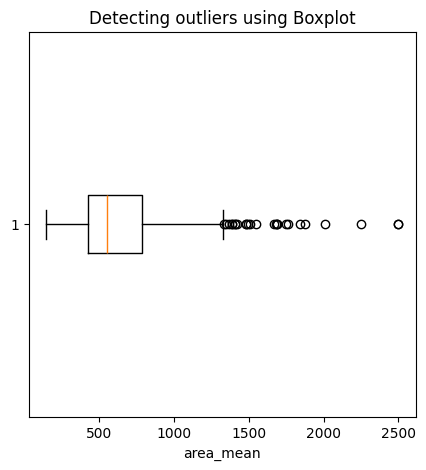

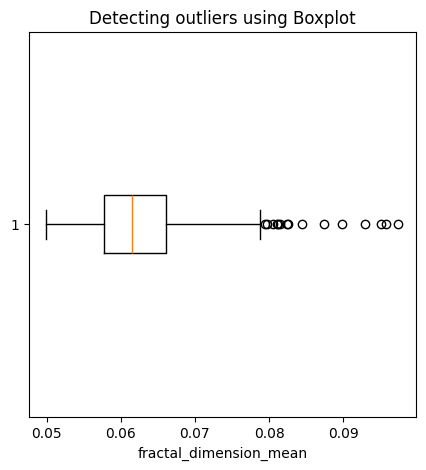

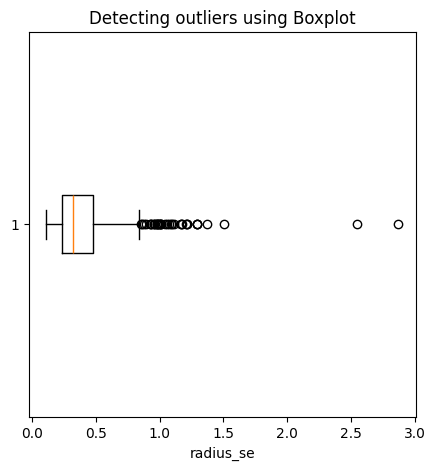

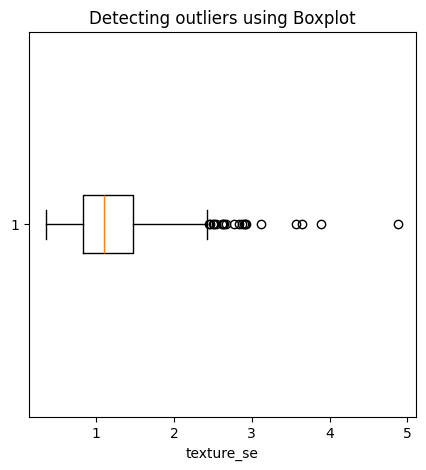

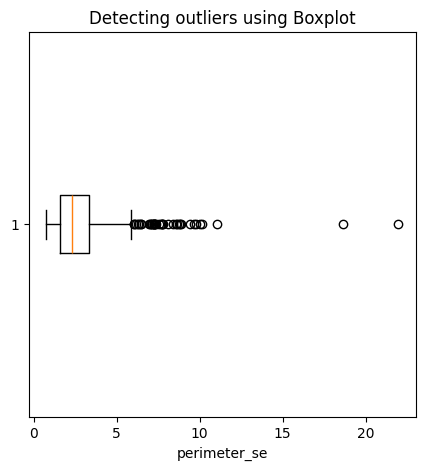

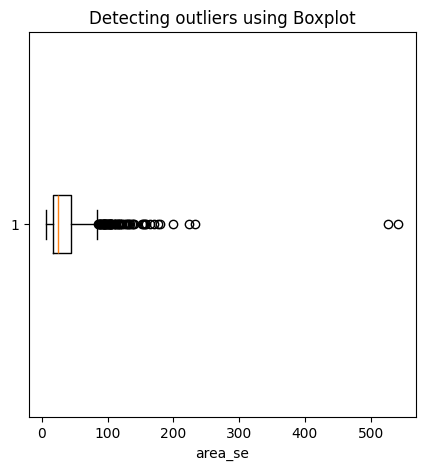

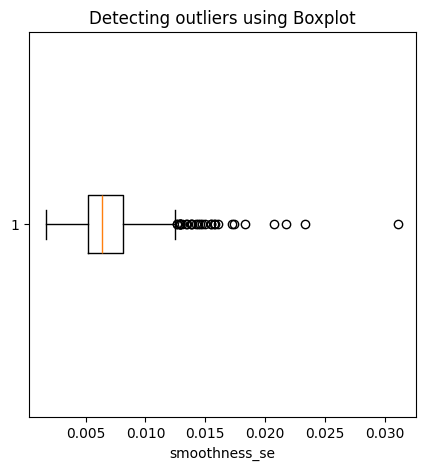

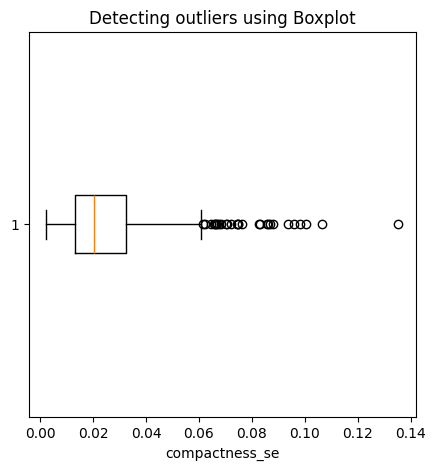

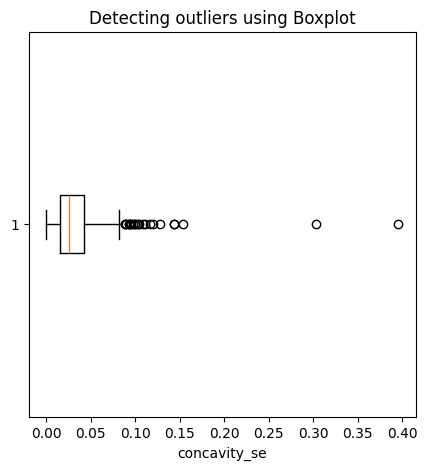

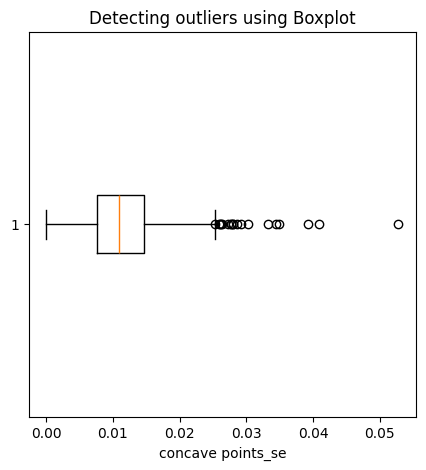

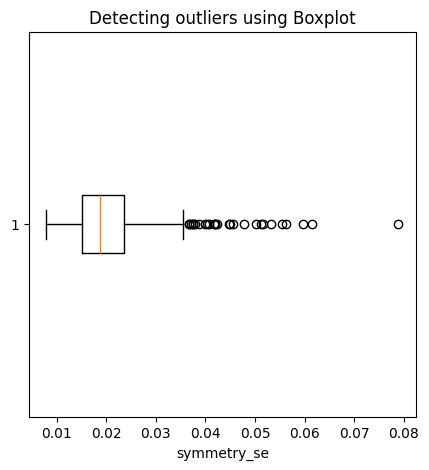

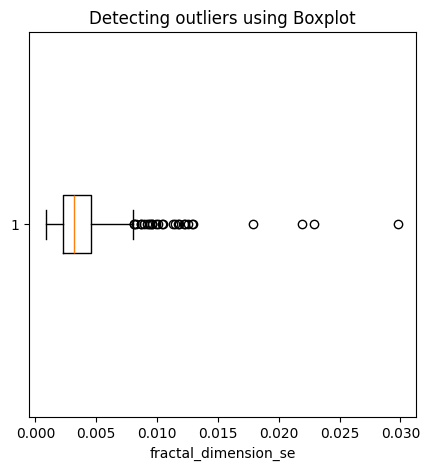

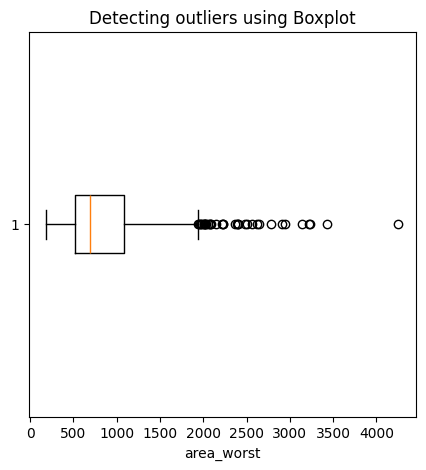

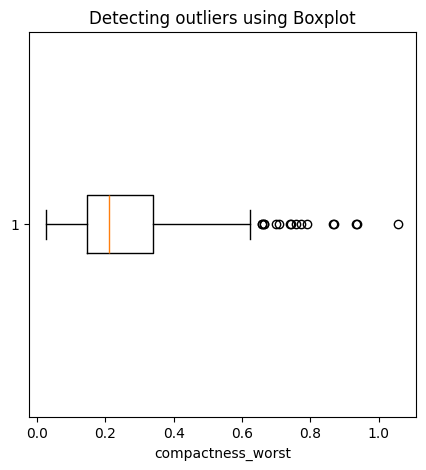

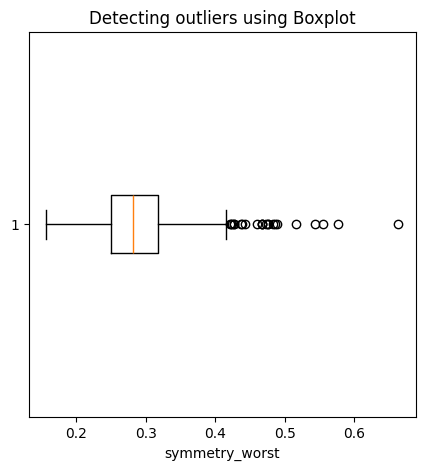

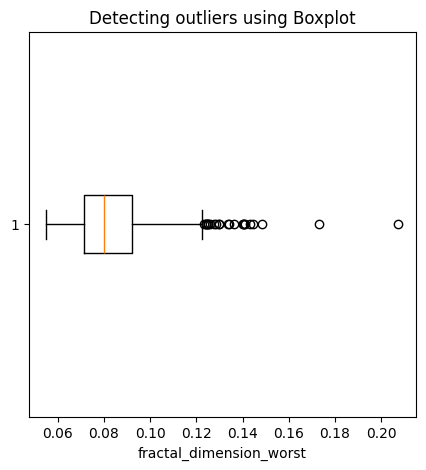

In [14]:
for col in data[['area_mean','fractal_dimension_mean','radius_se','texture_se',
                 'perimeter_se','area_se','smoothness_se','compactness_se','concavity_se','concave points_se',
                 'symmetry_se','fractal_dimension_se','area_worst','compactness_worst','symmetry_worst','fractal_dimension_worst']]:
  plt.figure(figsize=(5,5))
  plt.boxplot(data[col], vert=False)
  plt.title("Detecting outliers using Boxplot")
  plt.xlabel(col)
  plt.show()

In [15]:
outlier_data = data[['area_mean','fractal_dimension_mean','radius_se','texture_se',
                 'perimeter_se','area_se','smoothness_se','compactness_se','concavity_se','concave points_se',
                 'symmetry_se','fractal_dimension_se','area_worst','compactness_worst','symmetry_worst','fractal_dimension_worst']]
outlier_data.shape

(569, 16)

**DELETING OUTLIERS**

In [16]:
# Create a copy to avoid modifying the original DataFrame
data_cleaned = outlier_data.copy()
cols_to_check = outlier_data.columns
# Remove outliers column-wise using IQR
for col in cols_to_check:
    Q1 = data_cleaned[col].quantile(0.25)
    Q3 = data_cleaned[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Keep only rows within bounds
    data_cleaned = data_cleaned[(data_cleaned[col] >= lower_bound) & (data_cleaned[col] <= upper_bound)]

# Result
# print(f"Original shape: {data.shape}")
print(f"Cleaned shape: {data_cleaned.shape}")

Cleaned shape: (305, 16)


In [18]:
# Get the indices of the cleaned data (rows without outliers)
valid_indices = data_cleaned.index

# Filter the original data using those indices
data_updated = data.loc[valid_indices].reset_index(drop=True)

print(f"Original data shape: {data.shape}")
print(f"Updated data shape (after outlier removal): {data_updated.shape}")


Original data shape: (569, 31)
Updated data shape (after outlier removal): (305, 31)


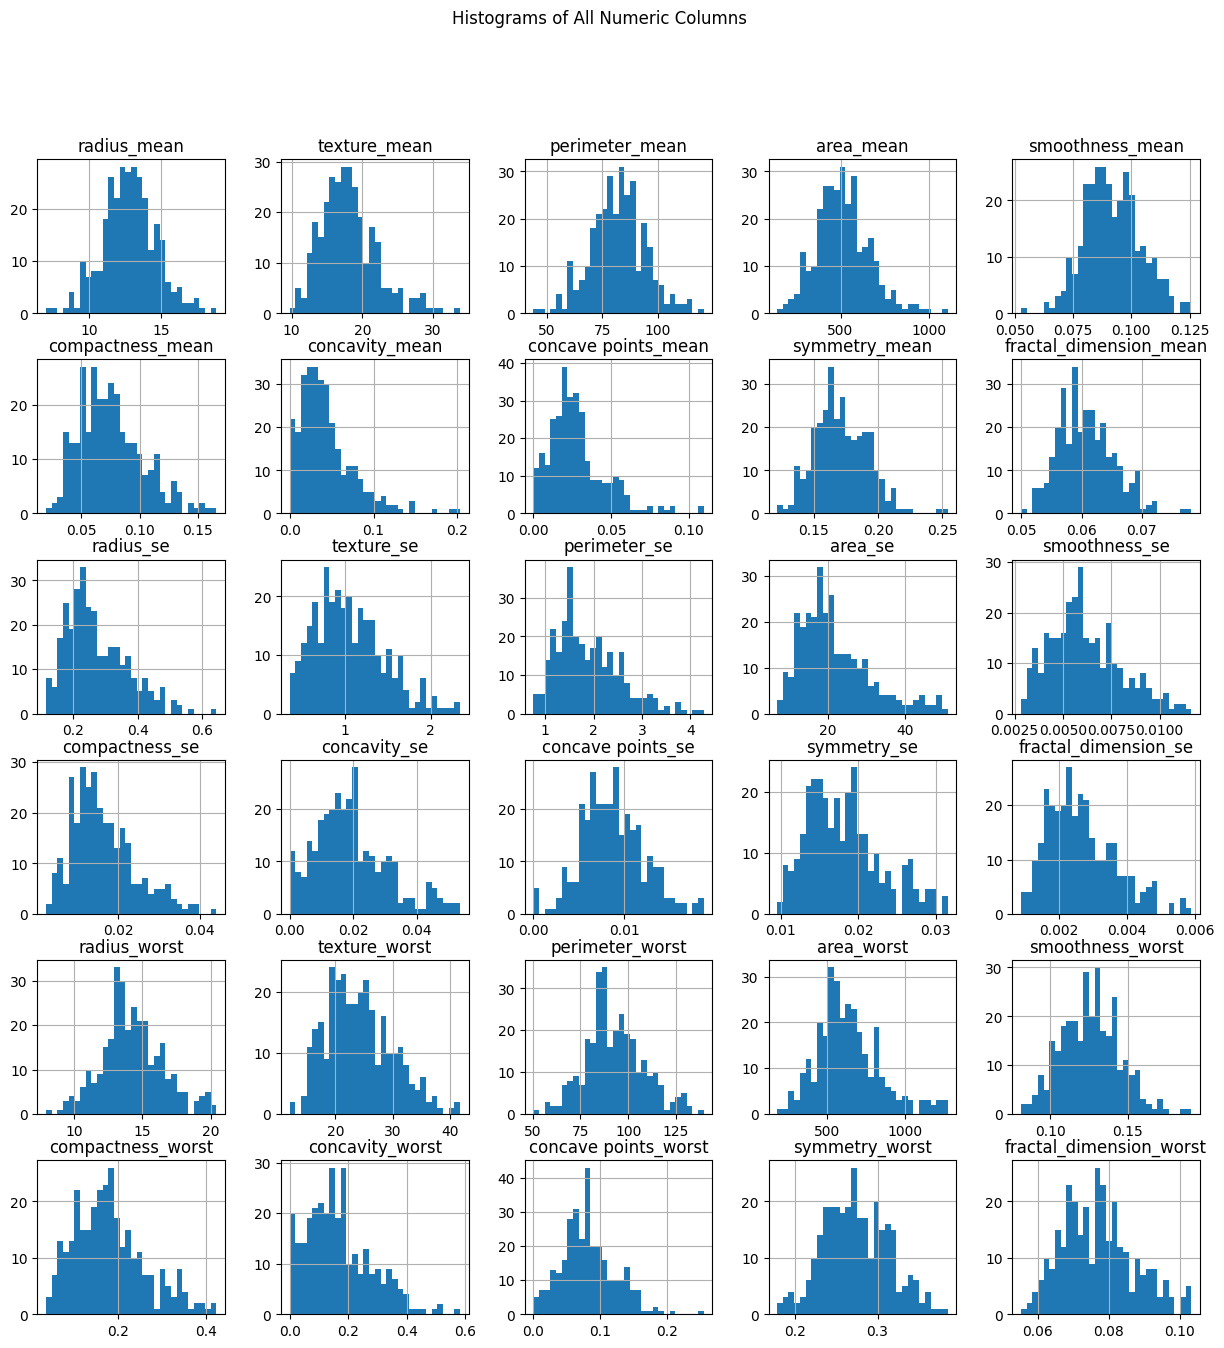

In [20]:
# Histogram for all numeric columns
data_updated.hist(figsize=(15, 15), bins=30)
plt.suptitle("Histograms of All Numeric Columns")
plt.show()

In [21]:
data_updated['diagnosis'].value_counts()

,count
diagnosis,
B,266
M,39


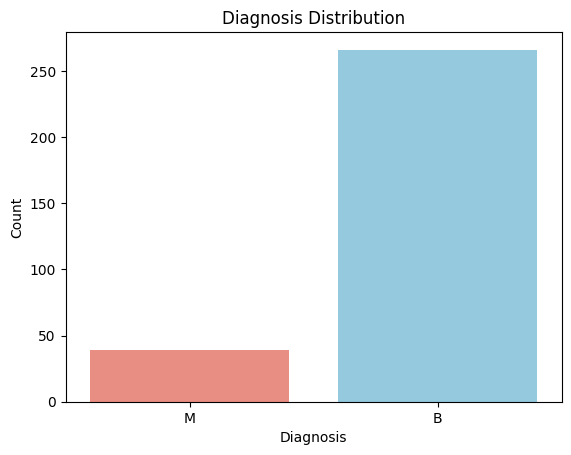

In [23]:
# Seaborn countplot
warnings.filterwarnings("ignore")  #Remove warnings on the output screen
sns.countplot(data=pd.DataFrame(data_updated['diagnosis']), x='diagnosis', palette={'B': 'skyblue', 'M': 'salmon'})
plt.title('Diagnosis Distribution')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.show()

# TRAIN-TEST SPLIT

In [26]:
# Split data into features (X) and labels (y)
X = data_updated.drop("diagnosis", axis=1)
y = data_updated.diagnosis
# Split test and train data
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2)

# MINORITY OVERSAMPLING{SMOTE}

In [34]:
# Initialize SMOTE
smote = SMOTE(sampling_strategy='minority')

# Fit and resample training data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Check class balance after SMOTE
print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", y_train_resampled.value_counts())

Before SMOTE: diagnosis
B    212
M     32
Name: count, dtype: int64
After SMOTE: diagnosis
B    212
M    212
Name: count, dtype: int64


**To be done from this part below!!!**

*This code creates an instance of RepeatedStratifiedKFold for cross-validation. It will split the data into 10 folds and repeat the process 3 times, ensuring that the class distribution is preserved in each fold.*

In [ ]:
cv_ori=RepeatedStratifiedKFold(n_splits=10, n_repeats=3)
cv_ori.split

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,recall_score,precision_score
lr=LogisticRegression().fit(X_train,y_train)
y_pred = lr.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
recall =recall_score(y_test,y_pred,average='macro')
precision = precision_score(y_test,y_pred,average='macro')
print(print(f'Accuracy : {accuracy}'))
print(print(f'precision : {precision}'))
print(print(f'Recall : {recall}'))

Accuracy : 0.956140350877193
None
precision : 0.9683544303797469
None
Recall : 0.9375
None


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


*This section trains a Logistic Regression model on the training data, makes predictions on the test data, and calculates the accuracy, precision, and recall scores for the model.

The rest of the code follows a similar pattern, where it trains and evaluates several other models, such as K-Nearest Neighbors (KNN), Support Vector Machines (SVM), Voting Ensemble, Gradient Boosting, AdaBoost, and Perceptron Neural Network.*

**LOGISTIC REGRESSION**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from itertools import product
from sklearn.ensemble import VotingClassifier
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import KFold,cross_val_score
from sklearn.metrics import accuracy_score
import numpy as np
##feature Scaling
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

*This part imports additional libraries and modules required for feature scaling, dimensionality reduction (PCA), and ensemble methods.*

In [ ]:
steps=[ ('scaler',StandardScaler()),
        ("PCA",PCA(n_components=20)),
        ("clf1", LogisticRegression())
      ]

# print(steps)
pipe=Pipeline(steps)
pipe

Pipeline(steps=[('scaler', StandardScaler()), ('PCA', PCA(n_components=20)),
                ('clf1', LogisticRegression())])

*This code creates a Pipeline object that chains together the steps of feature scaling (using StandardScaler), dimensionality reduction (using PCA with 20 principal components), and the Logistic Regression model.*

In [ ]:
# Evaluate model
scoring=['accuracy','precision_macro','recall_macro']
scores_ori = cross_validate(pipe, X, y, scoring=scoring, cv=cv_ori, n_jobs=-1)
# summarize performance
print('Mean Accuracy: %.4f' % np.mean(scores_ori['test_accuracy']))
print('Mean Precision: %.4f' % np.mean(scores_ori['test_precision_macro']))
print('Mean Recall: %.4f' % np.mean(scores_ori['test_recall_macro']))


Mean Accuracy: 0.9777
Mean Precision: 0.9782
Mean Recall: 0.9748


*This section evaluates the performance of the Pipeline object using cross_validate from sklearn.model_selection. It prints the mean accuracy, precision, and recall scores obtained from the repeated stratified cross-validation.

The code continues to create and evaluate similar Pipeline objects for other models, such as KNN, SVM, Voting Ensemble, Gradient Boosting, AdaBoost, and Perceptron Neural Network.*

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=4).fit(X_train,y_train)
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
recall =recall_score(y_test,y_pred,average='macro')
precision = precision_score(y_test,y_pred,average='macro')
print(print(f'Accuracy : {accuracy}'))
print(print(f'precision : {precision}'))
print(print(f'Recall : {recall}'))

Accuracy : 0.9298245614035088
None
precision : 0.9415441176470588
None
Recall : 0.9057432432432433
None


**KNN**

In [ ]:
steps_1=[ ('scaler',StandardScaler()),
        ("PCA",PCA(n_components=20)),
       ("clf2", KNeighborsClassifier(n_neighbors=4))
        ]
pipe_1 = Pipeline(steps_1)
# Evaluate model
scoring=['accuracy','precision_macro','recall_macro']
scores_ori = cross_validate(pipe_1, X, y, scoring=scoring, cv=cv_ori, n_jobs=-1)
# summarize performance
print('Mean Accuracy: %.4f' % np.mean(scores_ori['test_accuracy']))
print('Mean Precision: %.4f' % np.mean(scores_ori['test_precision_macro']))
print('Mean Recall: %.4f' % np.mean(scores_ori['test_recall_macro']))
# pipe_1.fit(X_train_smote,y_train_smote)
# print(pipe_1)
# kfold=KFold(10)
# results=cross_val_score(pipe_1,X,y,cv=kfold)
# print(results)
# print(f'Max :{np.max(results)}')
# print(f'Min :{np.min(results)}')
# print(np.mean(results))

Mean Accuracy: 0.9648
Mean Precision: 0.9720
Mean Recall: 0.9545


In [ ]:
from sklearn.svm import SVC
svc = SVC(kernel='rbf',probability=True).fit(X_train,y_train)
y_pred = svc.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
recall =recall_score(y_test,y_pred,average='macro')
precision = precision_score(y_test,y_pred,average='macro')
print(print(f'Accuracy : {accuracy}'))
print(print(f'precision : {precision}'))
print(print(f'Recall : {recall}'))
# print(print(f'Accuracy : {accuracy}'))

Accuracy : 0.9210526315789473
None
precision : 0.927124773960217
None
Recall : 0.8989864864864865
None


**SVC**

In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold

steps_2=[ ('scaler',StandardScaler()),
          ("PCA",PCA(n_components=20)),
         ("clf3 ",SVC(kernel='rbf', probability=True)),
         ]
print(steps_2)
pipe_2 = Pipeline(steps_2)
# Evaluate model
scoring=['accuracy','precision_macro','recall_macro']
scores_ori = cross_validate(pipe_2, X, y, scoring=scoring, cv=cv_ori, n_jobs=-1)
# summarize performance
print('Mean Accuracy: %.4f' % np.mean(scores_ori['test_accuracy']))
print('Mean Precision: %.4f' % np.mean(scores_ori['test_precision_macro']))
print('Mean Recall: %.4f' % np.mean(scores_ori['test_recall_macro']))
# print(pipe_2.fit(cv_ori))
# print(pipe_2)
# print(pipe_2.fit(X_train_smote,y_train_smote))
# kfold=KFold(10)
# # scoring=['accuracy','precision_macro','recall_macro']
# results=cross_val_score(pipe_2,X,y,cv=kfold)
# print(results)
# print(f'Max :{np.max(results)}')
# print(f'Min :{np.min(results)}')
# print(np.mean(results))

[('scaler', StandardScaler()), ('PCA', PCA(n_components=20)), ('clf3 ', SVC(probability=True))]
Mean Accuracy: 0.9713
Mean Precision: 0.9722
Mean Recall: 0.9672


**VOTING ENSEMBLE**

In [ ]:
steps_3=[ ('scaler',StandardScaler()),
          ("PCA",PCA(n_components=20)),
      ("eclf", VotingClassifier(estimators=[('lg',LogisticRegression()), ('knn',KNeighborsClassifier(n_neighbors=4)), ('svc',SVC(kernel='rbf', probability=True))],voting='hard'))]
print(steps_3)
pipe_3 = Pipeline(steps_3)
# Evaluate model
scoring=['accuracy','precision_macro','recall_macro']
scores_ori = cross_validate(pipe_3, X, y, scoring=scoring, cv=cv_ori, n_jobs=-1)
# summarize performance
print('Mean Accuracy: %.4f' % np.mean(scores_ori['test_accuracy']))
print('Mean Precision: %.4f' % np.mean(scores_ori['test_precision_macro']))
print('Mean Recall: %.4f' % np.mean(scores_ori['test_recall_macro']))
# print(pipe_3.fit(X_train_smote,y_train_smote))
# kfold=KFold(10)
# results=cross_val_score(pipe_3,X,y,cv=kfold)
# print(results)
# print(f'Max :{np.max(results)}')
# print(f'Min :{np.min(results)}')
# print(np.mean(results))

[('scaler', StandardScaler()), ('PCA', PCA(n_components=20)), ('eclf', VotingClassifier(estimators=[('lg', LogisticRegression()),
                             ('knn', KNeighborsClassifier(n_neighbors=4)),
                             ('svc', SVC(probability=True))]))]
Mean Accuracy: 0.9783
Mean Precision: 0.9808
Mean Recall: 0.9735


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(n_estimators=1000,learning_rate=0.01).fit(X_train,y_train)
y_pred = gb.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
recall =recall_score(y_test,y_pred,average='macro')
precision = precision_score(y_test,y_pred,average='macro')
print(print(f'Accuracy : {accuracy}'))
print(print(f'precision : {precision}'))
print(print(f'Recall : {recall}'))
# print(print(f'Accuracy : {accuracy}'))

Accuracy : 0.9649122807017544
None
precision : 0.9671052631578947
None
Recall : 0.9557432432432433
None


**GRADIENT-BOOSTING**

In [ ]:
# Create a Gradient Boosting Classifier for ensemble learning
# gb_classifier = GradientBoostingClassifier(n_estimators=2050, learning_rate=0.01, random_state=42)
from sklearn.ensemble import GradientBoostingClassifier
steps_4=[ ('scaler',StandardScaler()),
          ("PCA",PCA(n_components=20)),
      ("gb_classifier", GradientBoostingClassifier(n_estimators=1000, learning_rate=0.01))]
print(steps_4)
pipe_4 = Pipeline(steps_4)
# Evaluate model
# scoring=['accuracy','precision_macro','recall_macro']
# scores_ori = cross_validate(pipe_4, X, y, scoring=scoring, cv=cv_ori, n_jobs=-1)
# # summarize performance
# print('Mean Accuracy: %.4f' % np.mean(scores_ori['test_accuracy']))
# print('Mean Precision: %.4f' % np.mean(scores_ori['test_precision_macro']))
# print('Mean Recall: %.4f' % np.mean(scores_ori['test_recall_macro']))
# print(pipe_4.fit(X_train_smote,y_train_smote))
# kfold=KFold(10)
# results=cross_val_score(pipe_4,X,y,cv=kfold)
# print(results)
# print(f'Max :{np.max(results)}')
# print(f'Min :{np.min(results)}')
# print(np.mean(results))

[('scaler', StandardScaler()), ('PCA', PCA(n_components=20)), ('gb_classifier', GradientBoostingClassifier(learning_rate=0.01, n_estimators=1000))]


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators=1000).fit(X_train,y_train)
y_pred = ada.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
recall =recall_score(y_test,y_pred,average='macro')
precision = precision_score(y_test,y_pred,average='macro')
print(print(f'Accuracy : {accuracy}'))
print(print(f'precision : {precision}'))
print(print(f'Recall : {recall}'))

Accuracy : 0.9649122807017544
None
precision : 0.9671052631578947
None
Recall : 0.9557432432432433
None


**ADA BOOST**

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

steps_5=[ ('scaler',StandardScaler()),("PCA",PCA(n_components=20)),
      ("ada_classifier", AdaBoostClassifier(n_estimators=1000))]
print(steps_5)
pipe_5 = Pipeline(steps_5)
# Evaluate model
# scoring=['accuracy','precision_macro','recall_macro']
# scores_ori = cross_validate(pipe_5, X, y, scoring=scoring, cv=cv_ori, n_jobs=-1)
# # summarize performance
# print('Mean Accuracy: %.4f' % np.mean(scores_ori['test_accuracy']))
# print('Mean Precision: %.4f' % np.mean(scores_ori['test_precision_macro']))
# print('Mean Recall: %.4f' % np.mean(scores_ori['test_recall_macro']))
# print(pipe_5.fit(X_train_smote,y_train_smote))
# kfold=KFold(10)
# results=cross_val_score(pipe_5,X,y,cv=kfold)
# print(results)
# print(f'Max :{np.max(results)}')
# print(f'Min :{np.min(results)}')
# print(np.mean(results))

[('scaler', StandardScaler()), ('PCA', PCA(n_components=20)), ('ada_classifier', AdaBoostClassifier(n_estimators=1000))]


In [ ]:
from sklearn.neural_network import MLPClassifier
pnn = MLPClassifier(hidden_layer_sizes=500).fit(X_train,y_train)
y_pred = pnn.predict(X_test)
# y_pred = gb.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
recall =recall_score(y_test,y_pred,average='macro')
precision = precision_score(y_test,y_pred,average='macro')
print(print(f'Accuracy : {accuracy}'))
print(print(f'precision : {precision}'))
print(print(f'Recall : {recall}'))
# accuracy = accuracy_score(y_test,y_pred)
# print(print(f'Accuracy : {accuracy}'))

Accuracy : 0.8596491228070176
None
precision : 0.8571428571428572
None
Recall : 0.8918918918918919
None


**PERCEPTRON NEURAL NETWORK**

In [ ]:
from sklearn.neural_network import MLPClassifier
steps_6=[ ('scaler',StandardScaler()),("PCA",PCA(n_components=20)),
      ("mlp_classifier", MLPClassifier(hidden_layer_sizes=500))]
print(steps_6)
pipe_6 = Pipeline(steps_6)
# Evaluate model
# scoring=['accuracy','precision_macro','recall_macro']
# scores_ori = cross_validate(pipe_6, X, y, scoring=scoring, cv=cv_ori, n_jobs=-1)
# # summarize performance
# print('Mean Accuracy: %.4f' % np.mean(scores_ori['test_accuracy']))
# print('Mean Precision: %.4f' % np.mean(scores_ori['test_precision_macro']))
# print('Mean Recall: %.4f' % np.mean(scores_ori['test_recall_macro']))
# print(pipe_6.fit(X_train_smote,y_train_smote))

# kfold=KFold(10)
# results=cross_val_score(pipe_6,X,y,cv=kfold)
# print(results)
# print(f'Max :{np.max(results)}')
# print(f'Min :{np.min(results)}')
# print(np.mean(results))

[('scaler', StandardScaler()), ('PCA', PCA(n_components=20)), ('mlp_classifier', MLPClassifier(hidden_layer_sizes=500))]


In [ ]:
mypipes =[pipe, pipe_1,pipe_2,pipe_3,pipe_4,pipe_5,pipe_6]
accuracy = 0
precision_macro=0
recall_macro = 0
pipelines = ''
pipeline_dict={0:'LogisticRegresion', 1:'KNN', 2:'SVC', 3:'Voting Ensemble', 4:'Gradient boost',5:'Ada boost',6:'Perceptron Neural Network'}
scoring=['accuracy','precision_macro','recall_macro']
for i,model in enumerate(mypipes):
  scores_ori = cross_validate(model, X, y, scoring=scoring, cv=cv_ori, n_jobs=-1)
  print(pipeline_dict[i])
  print('Mean Accuracy: %.4f' % np.mean(scores_ori['test_accuracy']))
  print('Mean Precision: %.4f' % np.mean(scores_ori['test_precision_macro']))
  print('Mean Recall: %.4f' % np.mean(scores_ori['test_recall_macro']))

LogisticRegresion
Mean Accuracy: 0.9777
Mean Precision: 0.9791
Mean Recall: 0.9742
KNN
Mean Accuracy: 0.9648
Mean Precision: 0.9715
Mean Recall: 0.9548
SVC
Mean Accuracy: 0.9754
Mean Precision: 0.9762
Mean Recall: 0.9724
Voting Ensemble
Mean Accuracy: 0.9754
Mean Precision: 0.9786
Mean Recall: 0.9698
Gradient boost
Mean Accuracy: 0.9561
Mean Precision: 0.9578
Mean Recall: 0.9504
Ada boost
Mean Accuracy: 0.9601
Mean Precision: 0.9618
Mean Recall: 0.9543
Perceptron Neural Network
Mean Accuracy: 0.9789
Mean Precision: 0.9807
Mean Recall: 0.9746


*In this final section, the code creates a list mypipes containing all the Pipeline objects for the different models. It then iterates over this list and performs repeated stratified cross-validation on each model using cross_validate. It prints the name of the model and the mean accuracy, precision, and recall scores for each model.*
**Overall, this code explores several machine learning models for the breast cancer classification problem. It uses techniques like feature scaling, dimensionality reduction (PCA), and ensemble methods (Voting Ensemble, Gradient Boosting, AdaBoost) to improve the performance of the models. The code evaluates the models using repeated stratified cross-validation, which provides a more robust estimate of the model's performance by considering multiple splits of the data and preserving the class distribution in each fold.**